In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

In [0]:
df_train=pd.read_csv('/content/drive/My Drive/datasets/Tensorflow  community challenge /Datasets /Titanic/train.csv')
df_test=pd.read_csv(('/content/drive/My Drive/datasets/Tensorflow  community challenge /Datasets /Titanic/test.csv'))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



---



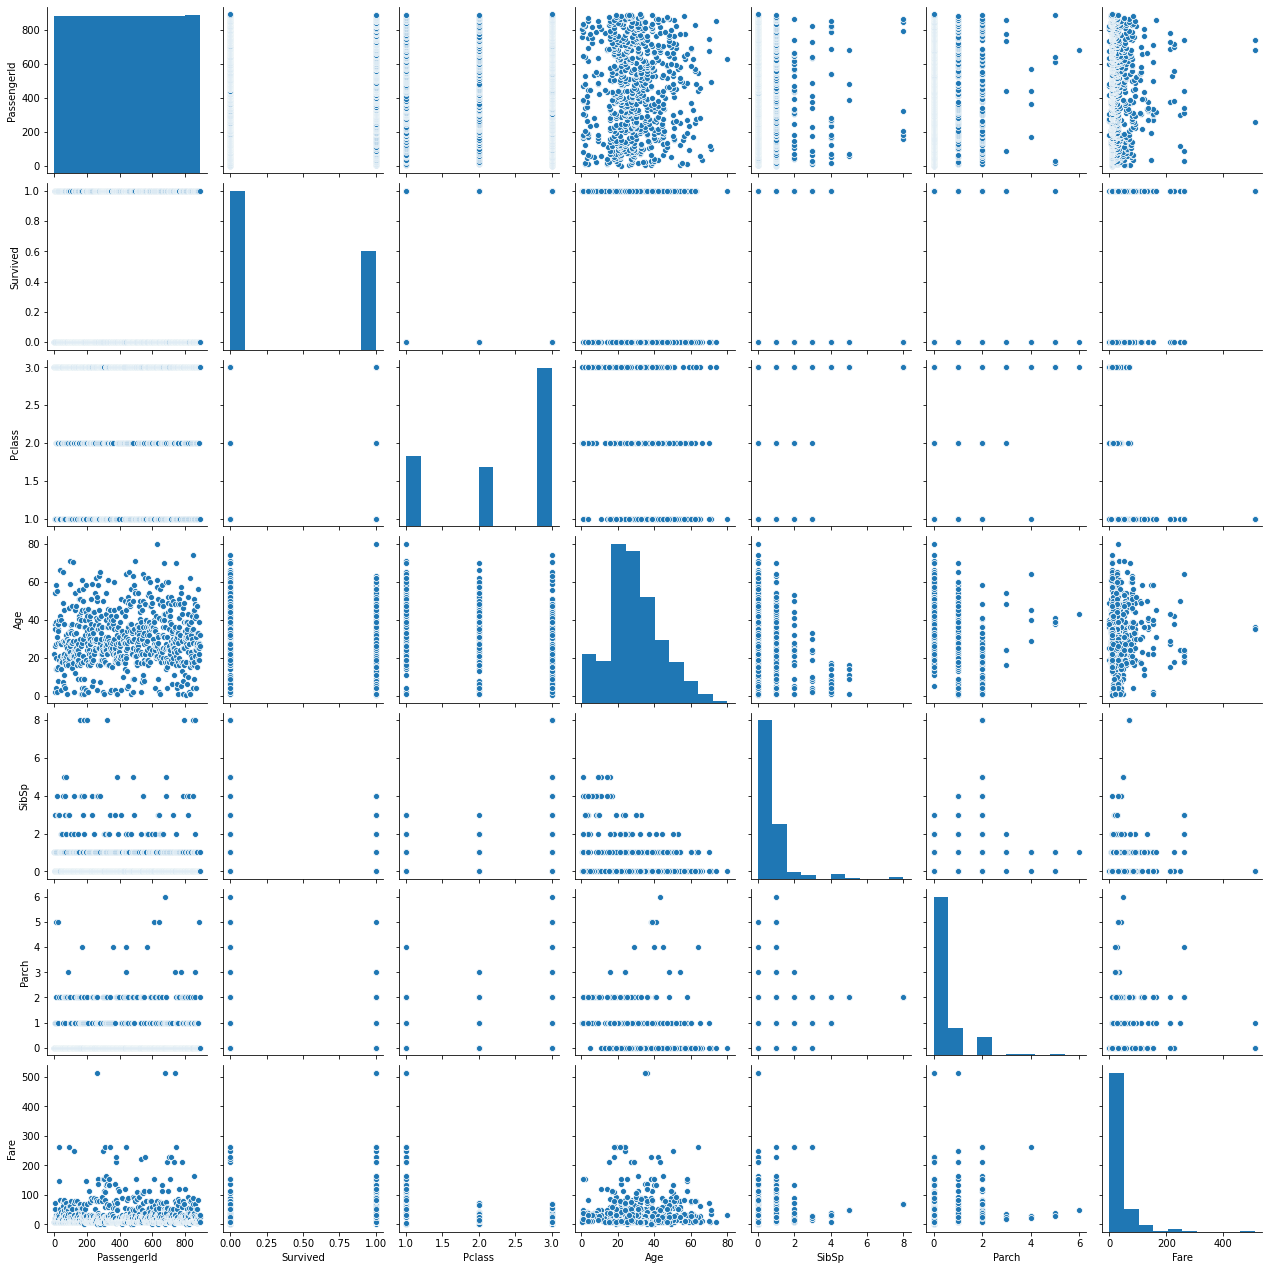

In [0]:
sns.pairplot(df_train)

realtion ship between sex and survived passangers

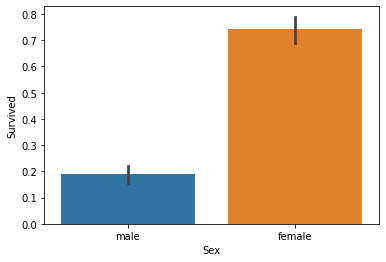

In [0]:
sns.barplot(x='Sex',y='Survived',data=df_train)

realation between passanger class and survived 

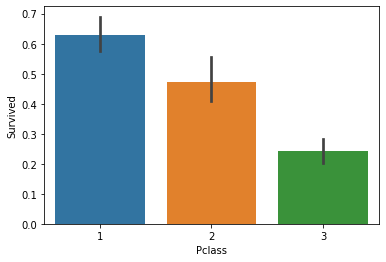

In [0]:
sns.barplot(data=df_train,x='Pclass',y="Survived")

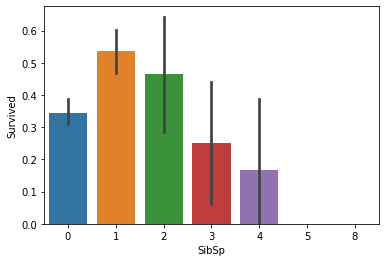

In [0]:
#realation between SibSp and survived 
sns.barplot(data=df_train,x='SibSp',y="Survived")

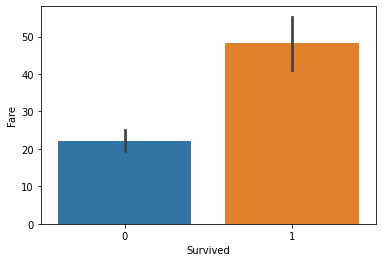

In [0]:
#realation between Fare and survived 
sns.barplot(data=df_train,y='Fare',x="Survived")

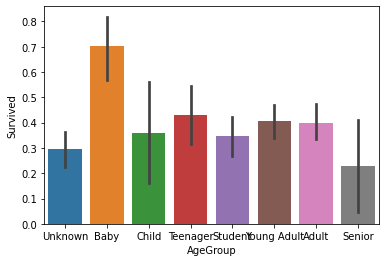

In [0]:
#realation between Age and survived 
df_train['Age']=df_train['Age'].fillna(-0.5)
df_test["Age"] = df_test["Age"].fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

df_train['AgeGroup']=pd.cut(df_train['Age'],bins,labels=labels)
df_test['AgeGroup']=pd.cut(df_test['Age'],bins,labels=labels)

sns.barplot(x='AgeGroup',y='Survived',data=df_train)

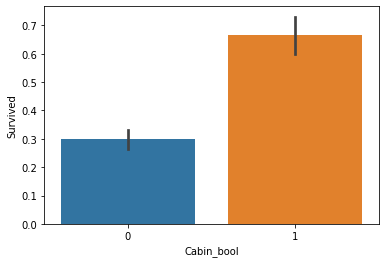

In [0]:
#cabin no vs survived 
df_train['Cabin_bool']=(df_train['Cabin'].notnull().astype('int'))
df_test['Cabin_bool']=(df_test['Cabin'].notnull().astype('int'))

sns.barplot(x='Cabin_bool',y='Survived',data=df_train)

In [0]:
# lets look for test data

df_test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_bool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Mock, Mr. Philipp Edmund",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [0]:
df_train = df_train.drop(['Cabin'], axis = 1)
df_test = df_test.drop(['Cabin'], axis = 1)

In [0]:
df_train = df_train.drop(['Ticket'], axis = 1)
df_test = df_test.drop(['Ticket'], axis = 1)

In [0]:
#replacing the missing values in the Embarked feature with S
df_train = df_train.fillna({"Embarked": "S"})

Age feature

In [0]:
combine = [df_train, df_test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [0]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [0]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_bool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [0]:
mr_age = df_train[df_train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = df_train[df_train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = df_train[df_train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = df_train[df_train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = df_train[df_train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = df_train[df_train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(df_train["AgeGroup"])):
    if df_train["AgeGroup"][x] == "Unknown":
        df_train["AgeGroup"][x] = age_title_mapping[df_train["Title"][x]]
        
for x in range(len(df_test["AgeGroup"])):
    if df_test["AgeGroup"][x] == "Unknown":
        df_test["AgeGroup"][x] = age_title_mapping[df_test["Title"][x]]

In [0]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
df_train['AgeGroup'] = df_train['AgeGroup'].map(age_mapping)
df_test['AgeGroup'] = df_test['AgeGroup'].map(age_mapping)

df_train.head()

#dropping the Age feature for now, might change
df_train = df_train.drop(['Age'], axis = 1)
df_test = df_test.drop(['Age'], axis = 1)

In [0]:
#drop the name feature since it contains no more useful information.
df_train = df_train.drop(['Name'], axis = 1)
df_test = df_test.drop(['Name'], axis = 1)

In [0]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_bool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [0]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)

df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_bool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [0]:
for x in range(len(df_test["Fare"])):
    if pd.isnull(df_test["Fare"][x]):
        pclass = df_test["Pclass"][x] #Pclass = 3
        df_test["Fare"][x] = round(df_train[df_train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4, labels = [1, 2, 3, 4])
df_test['FareBand'] = pd.qcut(df_test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
df_train = df_train.drop(['Fare'], axis = 1)
df_test = df_test.drop(['Fare'], axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabin_bool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [0]:
from sklearn.model_selection import train_test_split

predictors = df_train.drop(['Survived', 'PassengerId'], axis=1)
target = df_train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print('the validation acc of GradientBoostingClassifier is : ',acc_gbk)

the validation acc of GradientBoostingClassifier is :  84.77


In [0]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(y_val, y_pred)

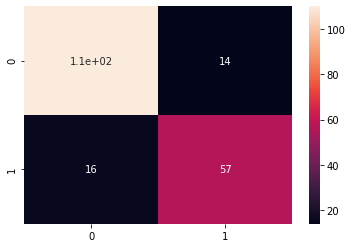

In [0]:
sns.heatmap(m,annot=True)

In [0]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    

In [0]:
model=GradientBoostingClassifier()

In [0]:
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(1, 5) 
                 }

In [0]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, 
                               cv = 10, n_iter = 30, n_jobs=-1)

In [0]:
randm.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                   

In [0]:
randm.best_estimator_.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7844158054460857, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=485,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8683276292904952,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)>

In [0]:
y_pred = randm.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print('the validation acc of GradientBoostingClassifier is : ',acc_gbk)

the validation acc of GradientBoostingClassifier is :  84.77


In [0]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(y_val, y_pred)

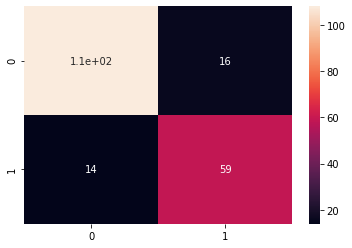

In [0]:
sns.heatmap(m,annot=True)

In [0]:
randm.best_score_,randm.best_params_

(0.8227536231884057,
 {'learning_rate': 0.7844158054460857,
  'max_depth': 1,
  'n_estimators': 485,
  'subsample': 0.8683276292904952})